<a href="https://colab.research.google.com/github/ChetanKnowIt/pyspark-colab/blob/main/spark_2_dataframes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataframes and Datasets

In [ ]:
pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 23.3 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=783a9b8e4a1e06d7ff43252f30800c9f4a8a7784e236eea8ef6c133a7250f896
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


In [ ]:
import pyspark
from pyspark.sql import SparkSession

In [ ]:

spark = SparkSession.builder.master("local[4]")\
										.appName('chetan')\
										.getOrCreate()

In [ ]:
sc = spark.sparkContext

### Read from CSV

In [ ]:
df = spark.read.csv('student.csv')
df

DataFrame[_c0: string, _c1: string, _c2: string, _c3: string, _c4: string]

In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
df.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)



In [ ]:
df.head(5)

[Row(_c0='roll', _c1='name', _c2='class', _c3='marks', _c4='age'),
 Row(_c0='1', _c1='anil', _c2='TE', _c3='56.77', _c4='22'),
 Row(_c0='2', _c1='amit', _c2='TE', _c3='59.77', _c4='21'),
 Row(_c0='3', _c1='aniket', _c2='BE', _c3='76.88', _c4='19'),
 Row(_c0='4', _c1='ajinkya', _c2='TE', _c3='69.66', _c4='20')]

In [ ]:
df2 = spark.read.option('header', True).csv('student.csv')
df2

DataFrame[roll: string, name: string, class: string, marks: string, age: string]

In [ ]:
df2.printSchema()

root
 |-- roll: string (nullable = true)
 |-- name: string (nullable = true)
 |-- class: string (nullable = true)
 |-- marks: string (nullable = true)
 |-- age: string (nullable = true)



In [ ]:
df2.head(5)

[Row(roll='1', name='anil', class='TE', marks='56.77', age='22'),
 Row(roll='2', name='amit', class='TE', marks='59.77', age='21'),
 Row(roll='3', name='aniket', class='BE', marks='76.88', age='19'),
 Row(roll='4', name='ajinkya', class='TE', marks='69.66', age='20'),
 Row(roll='5', name='asha', class='TE', marks='63.28', age='20')]

In [ ]:
df3 = spark.read.option('header',True).csv("student.csv,student5.csv")
df3

AnalysisException: ignored

In [ ]:
df4 = spark.read.csv("student3.tsv")
df4.head(5)

[Row(_c0='roll\tname\tclass\tmarks\tage'),
 Row(_c0='1\tanil\tTE\t56.77\t22'),
 Row(_c0='2\tamit\tTE\t59.77\t21'),
 Row(_c0='3\taniket\tBE\t76.88\t19'),
 Row(_c0='4\tajinkya\tTE\t69.66\t20')]

In [ ]:
df4 = spark.read.option('delimiter','\t').csv("student3.tsv")
df4.head(5)

[Row(_c0='roll', _c1='name', _c2='class', _c3='marks', _c4='age'),
 Row(_c0='1', _c1='anil', _c2='TE', _c3='56.77', _c4='22'),
 Row(_c0='2', _c1='amit', _c2='TE', _c3='59.77', _c4='21'),
 Row(_c0='3', _c1='aniket', _c2='BE', _c3='76.88', _c4='19'),
 Row(_c0='4', _c1='ajinkya', _c2='TE', _c3='69.66', _c4='20')]

In [ ]:
df4 = spark.read.option('delimiter','\t').option('header',True).csv("student3.tsv")
df4.head(5)

[Row(roll='1', name='anil', class='TE', marks='56.77', age='22'),
 Row(roll='2', name='amit', class='TE', marks='59.77', age='21'),
 Row(roll='3', name='aniket', class='BE', marks='76.88', age='19'),
 Row(roll='4', name='ajinkya', class='TE', marks='69.66', age='20'),
 Row(roll='5', name='asha', class='TE', marks='63.28', age='20')]

In [ ]:
df4.tail(5)

[Row(roll='6', name='ayesha', class='BE', marks='49.55', age='20'),
 Row(roll='7', name='amar', class='BE', marks='65.34', age='19'),
 Row(roll='8', name='amita', class='BE', marks='68.33', age='23'),
 Row(roll='9', name='amol', class='TE', marks='56.75', age='20'),
 Row(roll='10', name='anmol', class='BE', marks='78.66', age='21')]

In [ ]:
df4 = spark.read.options(delimiter='\t',header=True).csv("student3.tsv")
df4.head(5)

[Row(roll='1', name='anil', class='TE', marks='56.77', age='22'),
 Row(roll='2', name='amit', class='TE', marks='59.77', age='21'),
 Row(roll='3', name='aniket', class='BE', marks='76.88', age='19'),
 Row(roll='4', name='ajinkya', class='TE', marks='69.66', age='20'),
 Row(roll='5', name='asha', class='TE', marks='63.28', age='20')]

In [ ]:
df4 = spark.read.options(header=True, inferSchema=True).csv("student.csv")

In [ ]:
df4.printSchema()

root
 |-- roll: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- class: string (nullable = true)
 |-- marks: double (nullable = true)
 |-- age: integer (nullable = true)



# Create User Defined Schema

In [ ]:
 from pyspark.sql.types import *

In [ ]:
schema = StructType()\
                    .add("roll",IntegerType(), True)\
                    .add("name",StringType(), True)\
                    .add("class",StringType(), True)\
                    .add("marks",DoubleType(), True)\
                    .add("age",IntegerType(), True)


In [ ]:
df_s = spark.read.format("csv")\
                 .option("header", True)\
                 .schema(schema)\
                 .load("student.csv")

In [ ]:
df_s.head(4)

[Row(roll=1, name='anil', class='TE', marks=56.77, age=22),
 Row(roll=2, name='amit', class='TE', marks=59.77, age=21),
 Row(roll=3, name='aniket', class='BE', marks=76.88, age=19),
 Row(roll=4, name='ajinkya', class='TE', marks=69.66, age=20)]

In [ ]:
df_s.write.options(header=True).csv('newfile')

### Dataframe Operations
- dataframe in spark is distributed data collection
- more SQL like with columns and not same as pandas dataframe
- sqlContext is used for json


In [ ]:
df_json = spark.read.json("students.json")

In [ ]:
df_json.head(2)

[Row(_id=0, name='aimee Zank', scores=[Row(score=1.463179736705023, type='exam'), Row(score=11.78273309957772, type='quiz'), Row(score=35.8740349954354, type='homework')]),
 Row(_id=1, name='Aurelia Menendez', scores=[Row(score=60.06045071030959, type='exam'), Row(score=52.79790691903873, type='quiz'), Row(score=71.76133439165544, type='homework')])]

In [ ]:
type(df_json)

pyspark.sql.dataframe.DataFrame

In [ ]:
df_json.show()

+---+------------------+--------------------+
|_id|              name|              scores|
+---+------------------+--------------------+
|  0|        aimee Zank|[{1.4631797367050...|
|  1|  Aurelia Menendez|[{60.060450710309...|
|  2|       Corliss Zuk|[{67.030770960650...|
|  3|        Bao Ziglar|[{71.643438997783...|
|  4|  Zachary Langlais|[{78.683850913043...|
|  5|    Wilburn Spiess|[{44.871863301812...|
|  6|  Jenette Flanders|[{37.322854591660...|
|  7|      Salena Olmos|[{90.378265091571...|
|  8|      Daphne Zheng|[{22.135837128626...|
|  9|        Sanda Ryba|[{97.005099536546...|
| 10|      Denisha Cast|[{45.618768622594...|
| 11|      Marcus Blohm|[{78.426178356518...|
| 12|    Quincy Danaher|[{54.298412785206...|
| 13|  Jessika Dagenais|[{90.471799544274...|
| 14|     Alix Sherrill|[{25.159241519982...|
| 15|    Tambra Mercure|[{69.156502253315...|
| 16|     Dodie Staller|[{7.7723864428582...|
| 17|Fletcher Mcconnell|[{39.410110697292...|
| 18|  Verdell Sowinski|[{62.12870

In [ ]:
df_json.select('name').show()

+------------------+
|              name|
+------------------+
|        aimee Zank|
|  Aurelia Menendez|
|       Corliss Zuk|
|        Bao Ziglar|
|  Zachary Langlais|
|    Wilburn Spiess|
|  Jenette Flanders|
|      Salena Olmos|
|      Daphne Zheng|
|        Sanda Ryba|
|      Denisha Cast|
|      Marcus Blohm|
|    Quincy Danaher|
|  Jessika Dagenais|
|     Alix Sherrill|
|    Tambra Mercure|
|     Dodie Staller|
|Fletcher Mcconnell|
|  Verdell Sowinski|
|      Gisela Levin|
+------------------+
only showing top 20 rows



In [ ]:
df_json.select(['name','scores']).show()

+------------------+--------------------+
|              name|              scores|
+------------------+--------------------+
|        aimee Zank|[{1.4631797367050...|
|  Aurelia Menendez|[{60.060450710309...|
|       Corliss Zuk|[{67.030770960650...|
|        Bao Ziglar|[{71.643438997783...|
|  Zachary Langlais|[{78.683850913043...|
|    Wilburn Spiess|[{44.871863301812...|
|  Jenette Flanders|[{37.322854591660...|
|      Salena Olmos|[{90.378265091571...|
|      Daphne Zheng|[{22.135837128626...|
|        Sanda Ryba|[{97.005099536546...|
|      Denisha Cast|[{45.618768622594...|
|      Marcus Blohm|[{78.426178356518...|
|    Quincy Danaher|[{54.298412785206...|
|  Jessika Dagenais|[{90.471799544274...|
|     Alix Sherrill|[{25.159241519982...|
|    Tambra Mercure|[{69.156502253315...|
|     Dodie Staller|[{7.7723864428582...|
|Fletcher Mcconnell|[{39.410110697292...|
|  Verdell Sowinski|[{62.128702331090...|
|      Gisela Levin|[{44.512111019588...|
+------------------+--------------

In [ ]:
df2.filter(df2['marks']>60).show()

+----+-------+-----+-----+---+
|roll|   name|class|marks|age|
+----+-------+-----+-----+---+
|   3| aniket|   BE|76.88| 19|
|   4|ajinkya|   TE|69.66| 20|
|   5|   asha|   TE|63.28| 20|
|   7|   amar|   BE|65.34| 19|
|   8|  amita|   BE|68.33| 23|
|  10|  anmol|   BE|78.66| 21|
+----+-------+-----+-----+---+



In [ ]:
df2.filter((df2['marks']>60) & (df2['class']=='BE')).show()

+----+------+-----+-----+---+
|roll|  name|class|marks|age|
+----+------+-----+-----+---+
|   3|aniket|   BE|76.88| 19|
|   7|  amar|   BE|65.34| 19|
|   8| amita|   BE|68.33| 23|
|  10| anmol|   BE|78.66| 21|
+----+------+-----+-----+---+



In [ ]:
df2.groupBy('class').count().show()

+-----+-----+
|class|count|
+-----+-----+
|   TE|    5|
|   BE|    5|
+-----+-----+



In [ ]:
df4.groupBy('class').max().show()

+-----+---------+----------+--------+
|class|max(roll)|max(marks)|max(age)|
+-----+---------+----------+--------+
|   TE|        9|     69.66|      22|
|   BE|       10|     78.66|      23|
+-----+---------+----------+--------+



In [ ]:
df4.select(['class','marks']).groupBy('class').max().show()

+-----+----------+
|class|max(marks)|
+-----+----------+
|   TE|     69.66|
|   BE|     78.66|
+-----+----------+



In [ ]:
x = df4.toDF('roll','name','class','marks','age')
x.show(3)

+----+------+-----+-----+---+
|roll|  name|class|marks|age|
+----+------+-----+-----+---+
|   1|  anil|   TE|56.77| 22|
|   2|  amit|   TE|59.77| 21|
|   3|aniket|   BE|76.88| 19|
+----+------+-----+-----+---+
only showing top 3 rows



In [ ]:
a = [1,2,3]
b = a

In [ ]:
b.append(4)

In [ ]:
a, id(a)

([1, 2, 3, 4], 140438046224128)

In [ ]:
b, id(b)

([1, 2, 3, 4], 140438046224128)

In [ ]:
id(df4)

140438201327872

In [ ]:
id(x)

140438200996576

In [ ]:
newdf = df4.toDF('1','2','3','4','5')
newdf.show()

+---+-------+---+-----+---+
|  1|      2|  3|    4|  5|
+---+-------+---+-----+---+
|  1|   anil| TE|56.77| 22|
|  2|   amit| TE|59.77| 21|
|  3| aniket| BE|76.88| 19|
|  4|ajinkya| TE|69.66| 20|
|  5|   asha| TE|63.28| 20|
|  6| ayesha| BE|49.55| 20|
|  7|   amar| BE|65.34| 19|
|  8|  amita| BE|68.33| 23|
|  9|   amol| TE|56.75| 20|
| 10|  anmol| BE|78.66| 21|
+---+-------+---+-----+---+



In [ ]:
newdf.columns

['1', '2', '3', '4', '5']

In [ ]:
newdf.take(3)

[Row(1=1, 2='anil', 3='TE', 4=56.77, 5=22),
 Row(1=2, 2='amit', 3='TE', 4=59.77, 5=21),
 Row(1=3, 2='aniket', 3='BE', 4=76.88, 5=19)]

In [ ]:
df4.drop('class').show()

+----+-------+-----+---+
|roll|   name|marks|age|
+----+-------+-----+---+
|   1|   anil|56.77| 22|
|   2|   amit|59.77| 21|
|   3| aniket|76.88| 19|
|   4|ajinkya|69.66| 20|
|   5|   asha|63.28| 20|
|   6| ayesha|49.55| 20|
|   7|   amar|65.34| 19|
|   8|  amita|68.33| 23|
|   9|   amol|56.75| 20|
|  10|  anmol|78.66| 21|
+----+-------+-----+---+



In [ ]:
pdf = df4.toPandas()
pdf

,roll,name,class,marks,age
0,1,anil,TE,56.77,22
1,2,amit,TE,59.77,21
2,3,aniket,BE,76.88,19
3,4,ajinkya,TE,69.66,20
4,5,asha,TE,63.28,20
5,6,ayesha,BE,49.55,20
6,7,amar,BE,65.34,19
7,8,amita,BE,68.33,23
8,9,amol,TE,56.75,20
9,10,anmol,BE,78.66,21


In [ ]:
import pandas as pd


In [ ]:
gender = ['M','M','M','M','F','F','M','F','M','M']
pdf['gender'] = gender
pdf

,roll,name,class,marks,age,gender
0,1,anil,TE,56.77,22,M
1,2,amit,TE,59.77,21,M
2,3,aniket,BE,76.88,19,M
3,4,ajinkya,TE,69.66,20,M
4,5,asha,TE,63.28,20,F
5,6,ayesha,BE,49.55,20,F
6,7,amar,BE,65.34,19,M
7,8,amita,BE,68.33,23,F
8,9,amol,TE,56.75,20,M
9,10,anmol,BE,78.66,21,M


### Add .5% grace marks 

In [ ]:
pdf['marks'] = pdf['marks']+0.05*pdf['marks']
pdf

,roll,name,class,marks,age,gender
0,1,anil,TE,59.6085,22,M
1,2,amit,TE,62.7585,21,M
2,3,aniket,BE,80.7240,19,M
3,4,ajinkya,TE,73.1430,20,M
4,5,asha,TE,66.4440,20,F
5,6,ayesha,BE,52.0275,20,F
6,7,amar,BE,68.6070,19,M
7,8,amita,BE,71.7465,23,F
8,9,amol,TE,59.5875,20,M
9,10,anmol,BE,82.5930,21,M


In [ ]:
pdf['name'] = pdf['name'].str.upper()
pdf

,roll,name,class,marks,age,gender
0,1,ANIL,TE,59.6085,22,M
1,2,AMIT,TE,62.7585,21,M
2,3,ANIKET,BE,80.7240,19,M
3,4,AJINKYA,TE,73.1430,20,M
4,5,ASHA,TE,66.4440,20,F
5,6,AYESHA,BE,52.0275,20,F
6,7,AMAR,BE,68.6070,19,M
7,8,AMITA,BE,71.7465,23,F
8,9,AMOL,TE,59.5875,20,M
9,10,ANMOL,BE,82.5930,21,M


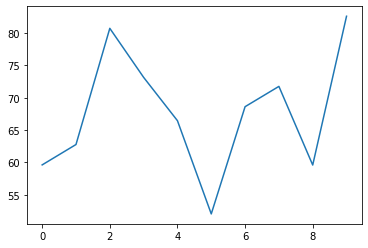

In [ ]:
pdf['marks'].plot()

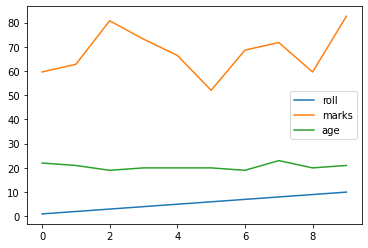

In [ ]:
pdf.plot()

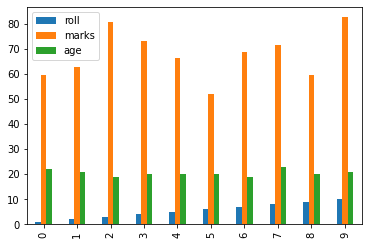

In [ ]:
pdf.plot.bar()

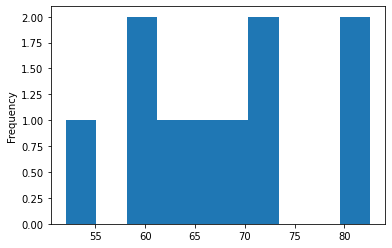

In [ ]:
pdf['marks'].plot.hist()

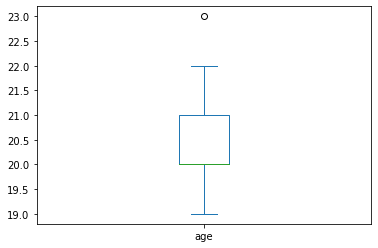

In [ ]:
pdf['age'].plot.box()

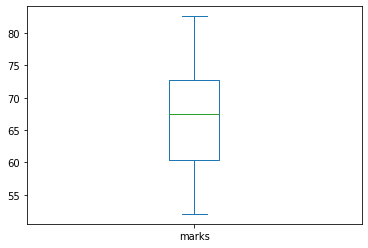

In [ ]:
pdf['marks'].plot.box()

In [ ]:
df4.show(n=3, vertical=True)

-RECORD 0-------
 roll  | 1      
 name  | anil   
 class | TE     
 marks | 56.77  
 age   | 22     
-RECORD 1-------
 roll  | 2      
 name  | amit   
 class | TE     
 marks | 59.77  
 age   | 21     
-RECORD 2-------
 roll  | 3      
 name  | aniket 
 class | BE     
 marks | 76.88  
 age   | 19     
only showing top 3 rows



In [ ]:
df4.orderBy('marks').show(4)

+----+------+-----+-----+---+
|roll|  name|class|marks|age|
+----+------+-----+-----+---+
|   6|ayesha|   BE|49.55| 20|
|   9|  amol|   TE|56.75| 20|
|   1|  anil|   TE|56.77| 22|
|   2|  amit|   TE|59.77| 21|
+----+------+-----+-----+---+
only showing top 4 rows



In [ ]:
pdf.sort_values(by='marks', ascending=False).head()

,roll,name,class,marks,age,gender
9,10,ANMOL,BE,82.5930,21,M
2,3,ANIKET,BE,80.7240,19,M
3,4,AJINKYA,TE,73.1430,20,M
7,8,AMITA,BE,71.7465,23,F
6,7,AMAR,BE,68.6070,19,M


In [ ]:
df4.describe().show()

+-------+------------------+-------+-----+-----------------+------------------+
|summary|              roll|   name|class|            marks|               age|
+-------+------------------+-------+-----+-----------------+------------------+
|  count|                10|     10|   10|               10|                10|
|   mean|               5.5|   null| null|           64.499|              20.5|
| stddev|3.0276503540974917|   null| null|9.207178901994537|1.2692955176439846|
|    min|                 1|ajinkya|   BE|            49.55|                19|
|    max|                10| ayesha|   TE|            78.66|                23|
+-------+------------------+-------+-----+-----------------+------------------+



In [ ]:
df4.describe('marks','age').show()

+-------+-----------------+------------------+
|summary|            marks|               age|
+-------+-----------------+------------------+
|  count|               10|                10|
|   mean|           64.499|              20.5|
| stddev|9.207178901994537|1.2692955176439846|
|    min|            49.55|                19|
|    max|            78.66|                23|
+-------+-----------------+------------------+



In [ ]:
df4.agg({'marks':'stddev'}).show()

+-----------------+
|    stddev(marks)|
+-----------------+
|9.207178901994537|
+-----------------+



In [ ]:
df4.summary().show()

+-------+------------------+-------+-----+-----------------+------------------+
|summary|              roll|   name|class|            marks|               age|
+-------+------------------+-------+-----+-----------------+------------------+
|  count|                10|     10|   10|               10|                10|
|   mean|               5.5|   null| null|           64.499|              20.5|
| stddev|3.0276503540974917|   null| null|9.207178901994537|1.2692955176439846|
|    min|                 1|ajinkya|   BE|            49.55|                19|
|    25%|                 3|   null| null|            56.77|                20|
|    50%|                 5|   null| null|            63.28|                20|
|    75%|                 8|   null| null|            69.66|                21|
|    max|                10| ayesha|   TE|            78.66|                23|
+-------+------------------+-------+-----+-----------------+------------------+



In [ ]:
df4.summary('mean','50%').show()

+-------+----+----+-----+------+----+
|summary|roll|name|class| marks| age|
+-------+----+----+-----+------+----+
|   mean| 5.5|null| null|64.499|20.5|
|    50%|   5|null| null| 63.28|  20|
+-------+----+----+-----+------+----+

